#  Fit Awmi

This macro fits the source spectrum using the AWMI algorithm
from the "TSpectrumFit" class ("TSpectrum" class is used to find peaks).

To try this macro, in a ROOT (5 or 6) prompt, do:

```cpp
 root > .x FitAwmi.C
```

or:

```cpp
 root > .x FitAwmi.C++
 root > FitAwmi(); // re-run with another random set of peaks
```




**Author:**   
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:36 AM.</small></i>

In [1]:
%%cpp -d
#include "TROOT.h"
#include "TMath.h"
#include "TRandom.h"
#include "TH1.h"
#include "TF1.h"
#include "TCanvas.h"
#include "TSpectrum.h"
#include "TSpectrumFit.h"
#include "TPolyMarker.h"
#include "TList.h"

#include <iostream>

TH1F *FitAwmi_Create_Spectrum(void) {
   Int_t nbins = 1000;
   Double_t xmin = -10., xmax = 10.;
   delete gROOT->FindObject("h"); // prevent "memory leak"
   TH1F *h = new TH1F("h", "simulated spectrum", nbins, xmin, xmax);
   h->SetStats(kFALSE);
   TF1 f("f", "TMath::Gaus(x, [0], [1], 1)", xmin, xmax);
   // f.SetParNames("mean", "sigma");
   gRandom->SetSeed(0); // make it really random
   // create well separated peaks with exactly known means and areas
   // note: TSpectrumFit assumes that all peaks have the same sigma
   Double_t sigma = (xmax - xmin) / Double_t(nbins) * Int_t(gRandom->Uniform(2., 6.));
   Int_t npeaks = 0;
   while (xmax > (xmin + 6. * sigma)) {
      npeaks++;
      xmin += 3. * sigma; // "mean"
      f.SetParameters(xmin, sigma);
      Double_t area = 1. * Int_t(gRandom->Uniform(1., 11.));
      h->Add(&f, area, ""); // "" ... or ... "I"
      std::cout << "created "
                << xmin << " "
                << (area / sigma / TMath::Sqrt(TMath::TwoPi())) << " "
                << area << std::endl;
      xmin += 3. * sigma;
   }
   std::cout << "the total number of created peaks = " << npeaks
             << " with sigma = " << sigma << std::endl;
   return h;
}

 Arguments are defined. 

In [2]:
TH1F *h = FitAwmi_Create_Spectrum();

TCanvas *cFit = ((TCanvas *)(gROOT->GetListOfCanvases()->FindObject("cFit")));
if (!cFit) cFit = new TCanvas("cFit", "cFit", 10, 10, 1000, 700);
else cFit->Clear();
h->Draw("L");
Int_t i, nfound, bin;
Int_t nbins = h->GetNbinsX();

Double_t *source = new Double_t[nbins];
Double_t *dest = new Double_t[nbins];

for (i = 0; i < nbins; i++) source[i] = h->GetBinContent(i + 1);
TSpectrum *s = new TSpectrum(); // note: default maxpositions = 100

created -9.76 39.8942 8
created -9.28 14.9603 3
created -8.8 34.9074 7
created -8.32 49.8678 10
created -7.84 44.881 9
created -7.36 4.98678 1
created -6.88 24.9339 5
created -6.4 19.9471 4
created -5.92 24.9339 5
created -5.44 24.9339 5
created -4.96 34.9074 7
created -4.48 34.9074 7
created -4 49.8678 10
created -3.52 19.9471 4
created -3.04 39.8942 8
created -2.56 39.8942 8
created -2.08 39.8942 8
created -1.6 44.881 9
created -1.12 49.8678 10
created -0.64 44.881 9
created -0.16 4.98678 1
created 0.32 49.8678 10
created 0.8 29.9207 6
created 1.28 29.9207 6
created 1.76 4.98678 1
created 2.24 4.98678 1
created 2.72 14.9603 3
created 3.2 19.9471 4
created 3.68 19.9471 4
created 4.16 39.8942 8
created 4.64 4.98678 1
created 5.12 29.9207 6
created 5.6 24.9339 5
created 6.08 19.9471 4
created 6.56 49.8678 10
created 7.04 24.9339 5
created 7.52 4.98678 1
created 8 4.98678 1
created 8.48 29.9207 6
created 8.96 39.8942 8
created 9.44 34.9074 7
the total number of created peaks = 41 with si

Searching for candidate peaks positions

In [3]:
nfound = s->SearchHighRes(source, dest, nbins, 2., 2., kFALSE, 10000, kFALSE, 0);

Filling in the initial estimates of the input parameters

In [4]:
Bool_t *FixPos = new Bool_t[nfound];
Bool_t *FixAmp = new Bool_t[nfound];
for(i = 0; i < nfound; i++) FixAmp[i] = FixPos[i] = kFALSE;

Double_t *Pos, *Amp = new Double_t[nfound]; // ROOT 6

Pos = s->GetPositionX(); // 0 ... (nbins - 1)
for (i = 0; i < nfound; i++) {
   bin = 1 + Int_t(Pos[i] + 0.5); // the "nearest" bin
   Amp[i] = h->GetBinContent(bin);
}
TSpectrumFit *pfit = new TSpectrumFit(nfound);
pfit->SetFitParameters(0, (nbins - 1), 1000, 0.1, pfit->kFitOptimChiCounts,
                       pfit->kFitAlphaHalving, pfit->kFitPower2,
                       pfit->kFitTaylorOrderFirst);
pfit->SetPeakParameters(2., kFALSE, Pos, FixPos, Amp, FixAmp);

Pfit->setbackgroundparameters(source[0], kfalse, 0., kfalse, 0., kfalse);

In [5]:
pfit->FitAwmi(source);
Double_t *Positions = pfit->GetPositions();
Double_t *PositionsErrors = pfit->GetPositionsErrors();
Double_t *Amplitudes = pfit->GetAmplitudes();
Double_t *AmplitudesErrors = pfit->GetAmplitudesErrors();
Double_t *Areas = pfit->GetAreas();
Double_t *AreasErrors = pfit->GetAreasErrors();
delete gROOT->FindObject("d"); // prevent "memory leak"
TH1F *d = new TH1F(*h); d->SetNameTitle("d", ""); d->Reset("M");
for (i = 0; i < nbins; i++) d->SetBinContent(i + 1, source[i]);
Double_t x1 = d->GetBinCenter(1), dx = d->GetBinWidth(1);
Double_t sigma, sigmaErr;
pfit->GetSigma(sigma, sigmaErr);

Current tspectrumfit needs a sqrt(2) correction factor for sigma

In [6]:
sigma /= TMath::Sqrt2(); sigmaErr /= TMath::Sqrt2();

Convert "bin numbers" into "x-axis values"

In [7]:
sigma *= dx; sigmaErr *= dx;

std::cout << "the total number of found peaks = " << nfound
          << " with sigma = " << sigma << " (+-" << sigmaErr << ")"
          << std::endl;
std::cout << "fit chi^2 = " << pfit->GetChi() << std::endl;
for (i = 0; i < nfound; i++) {
   bin = 1 + Int_t(Positions[i] + 0.5); // the "nearest" bin
   Pos[i] = d->GetBinCenter(bin);
   Amp[i] = d->GetBinContent(bin);

   // convert "bin numbers" into "x-axis values"
   Positions[i] = x1 + Positions[i] * dx;
   PositionsErrors[i] *= dx;
   Areas[i] *= dx;
   AreasErrors[i] *= dx;

   std::cout << "found "
             << Positions[i] << " (+-" << PositionsErrors[i] << ") "
             << Amplitudes[i] << " (+-" << AmplitudesErrors[i] << ") "
             << Areas[i] << " (+-" << AreasErrors[i] << ")"
             << std::endl;
}
d->SetLineColor(kRed); d->SetLineWidth(1);
d->Draw("SAME L");
TPolyMarker *pm = ((TPolyMarker*)(h->GetListOfFunctions()->FindObject("TPolyMarker")));
if (pm) {
   h->GetListOfFunctions()->Remove(pm);
   delete pm;
}
pm = new TPolyMarker(nfound, Pos, Amp);
h->GetListOfFunctions()->Add(pm);
pm->SetMarkerStyle(23);
pm->SetMarkerColor(kRed);
pm->SetMarkerSize(1);

the total number of found peaks = 41 with sigma = 0.0800011 (+-2.59667e-05)
fit chi^2 = 3.96901e-06
found -8.32 (+-0.000219681) 49.8679 (+-0.134791) 10.0002 (+-0.00089261)
found -4 (+-0.000219079) 49.8677 (+-0.134746) 10.0001 (+-0.000892311)
found -1.12 (+-0.000219888) 49.868 (+-0.134807) 10.0002 (+-0.000892715)
found 0.320001 (+-0.000218286) 49.8675 (+-0.134691) 10.0001 (+-0.000891947)
found 6.56 (+-0.000218833) 49.8676 (+-0.134727) 10.0001 (+-0.000892188)
found -7.84 (+-0.000230666) 44.881 (+-0.127819) 9.00011 (+-0.000846439)
found -1.6 (+-0.00023197) 44.8813 (+-0.127902) 9.00018 (+-0.000846992)
found -0.640001 (+-0.000230666) 44.881 (+-0.127819) 9.00011 (+-0.000846439)
found -9.76 (+-0.000244638) 39.8939 (+-0.120492) 8.00003 (+-0.000797923)
found -3.04 (+-0.000245436) 39.8943 (+-0.120551) 8.00012 (+-0.000798308)
found -2.56 (+-0.000246049) 39.8945 (+-0.120588) 8.00016 (+-0.000798555)
found -2.08 (+-0.000246169) 39.8946 (+-0.120595) 8.00017 (+-0.000798605)
found 4.16 (+-0.000244002) 

Cleanup

In [8]:
delete pfit;
delete [] Amp;
delete [] FixAmp;
delete [] FixPos;
delete s;
delete [] dest;
delete [] source;
return;

Draw all canvases 

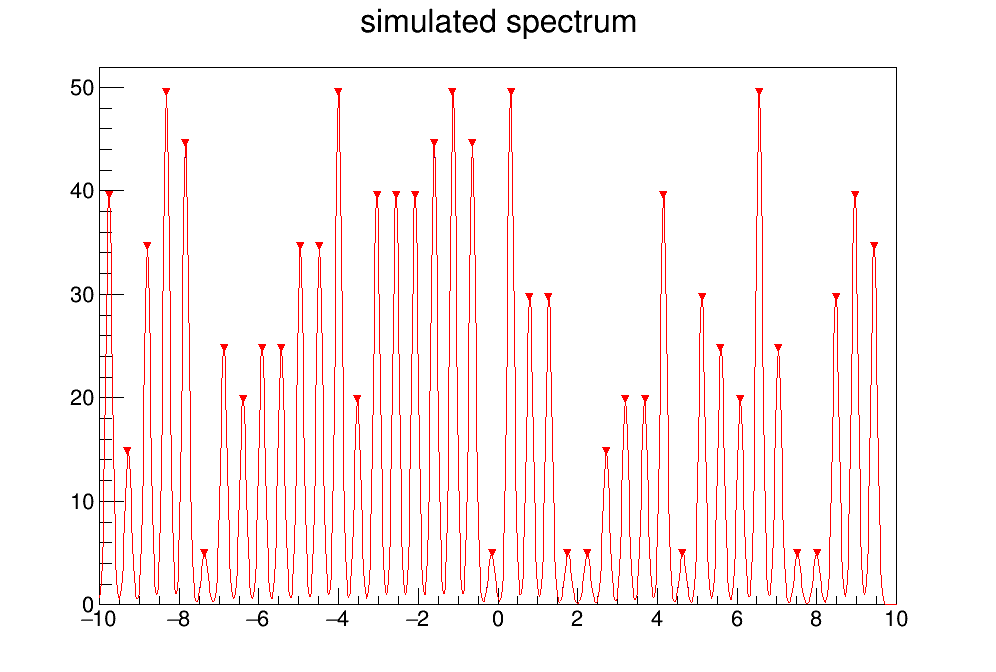

In [9]:
gROOT->GetListOfCanvases()->Draw()